In [1]:
import audb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
def vis_hist(df, x='emotion', hue=None, hue_order=None, title=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    sns.histplot(data=df, x=x, hue=hue, ax=ax, multiple='dodge', hue_order=hue_order, shrink=.8)
    if title is not None:
        ax.set_title(title)
    if hue is not None:
        move_legend(ax, "center left", bbox_to_anchor=(1., 0.5), ncol=3, title_fontsize=14)
    plt.tight_layout()

Get:   ravdess v1.0.1
Cache: /home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91


,emotion,emotional intensity,vocal channel,speaker,gender
file,,,,,
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/songs/actor_06/03-02-04-02-02-01-06.wav,sad,strong,song,06,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/songs/actor_06/03-02-02-02-01-01-06.wav,calm,strong,song,06,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/songs/actor_06/03-02-03-02-01-02-06.wav,happy,strong,song,06,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/songs/actor_06/03-02-06-01-02-01-06.wav,fearful,normal,song,06,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/songs/actor_06/03-02-06-02-01-02-06.wav,fearful,strong,song,06,female
...,...,...,...,...,...
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/speech/actor_08/03-01-06-01-01-01-08.wav,fearful,normal,speech,08,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/speech/actor_08/03-01-01-01-01-02-08.wav,neutral,normal,speech,08,female
/home/audeering.local/aderington/audb/ravdess/1.0.1/fe182b91/speech/actor_08/03-01-03-01-01-01-08.wav,happy,normal,speech,08,female


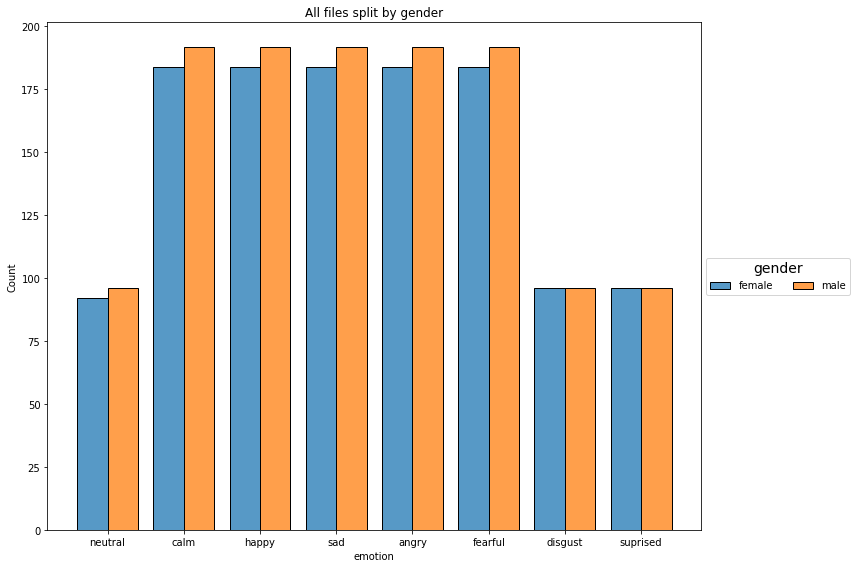

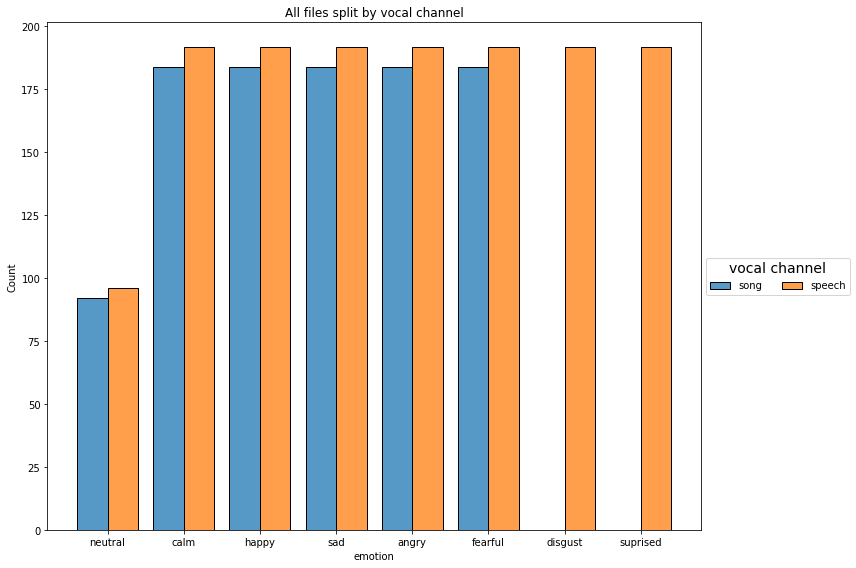

In [2]:
db = audb.load(
    name='ravdess',
    version='1.0.1',
    format='wav',
    sampling_rate=16000,
    mixdown=True,
    only_metadata=True,

)
emotion_df = db.tables['emotion'].get()
meta = db.tables["files"].get(index=emotion_df.index)
meta["gender"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["gender"])
emotion_df.loc[emotion_df.index, "vocal channel"] = meta["vocal channel"]
emotion_df.loc[emotion_df.index, "speaker"] = meta["speaker"]
emotion_df.loc[emotion_df.index, "gender"] = meta["gender"]
display(emotion_df)
vis_hist(emotion_df, hue='gender', title='All files split by gender', hue_order=['female', 'male'])
vis_hist(emotion_df, hue='vocal channel', title='All files split by vocal channel', hue_order=['song', 'speech'])

In [3]:
speaker_df = pd.DataFrame.from_dict(db.schemes["speaker"].labels, orient="index")
speaker_df

,gender,language
01,male,English
02,female,English
03,male,English
04,female,English
05,male,English
06,female,English
07,male,English
08,female,English
09,male,English
10,female,English


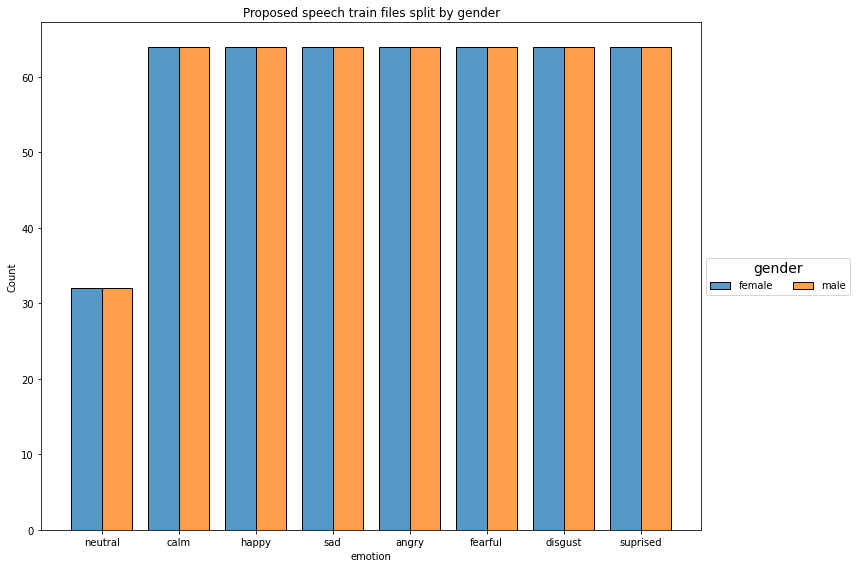

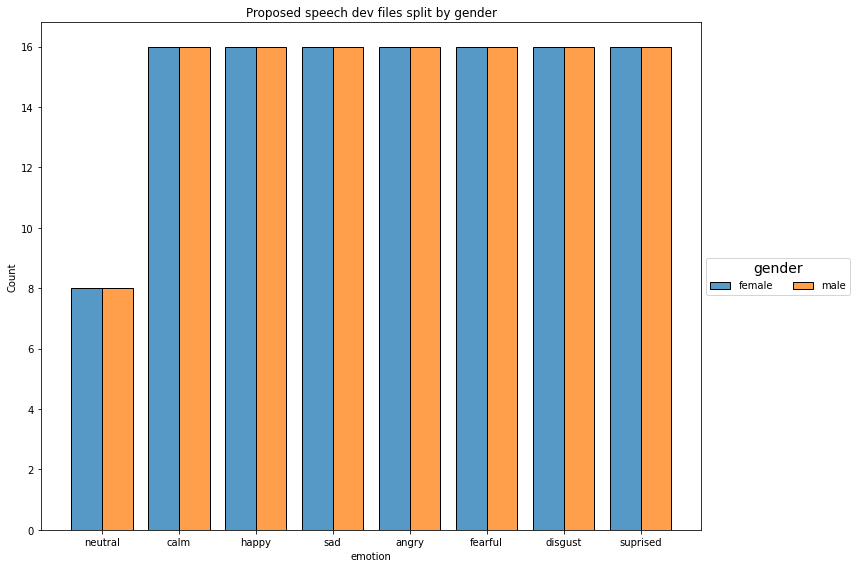

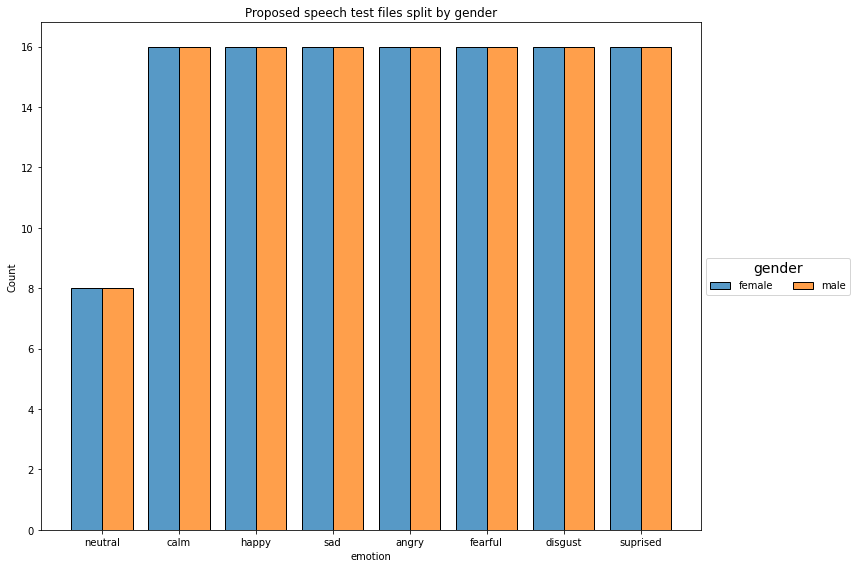

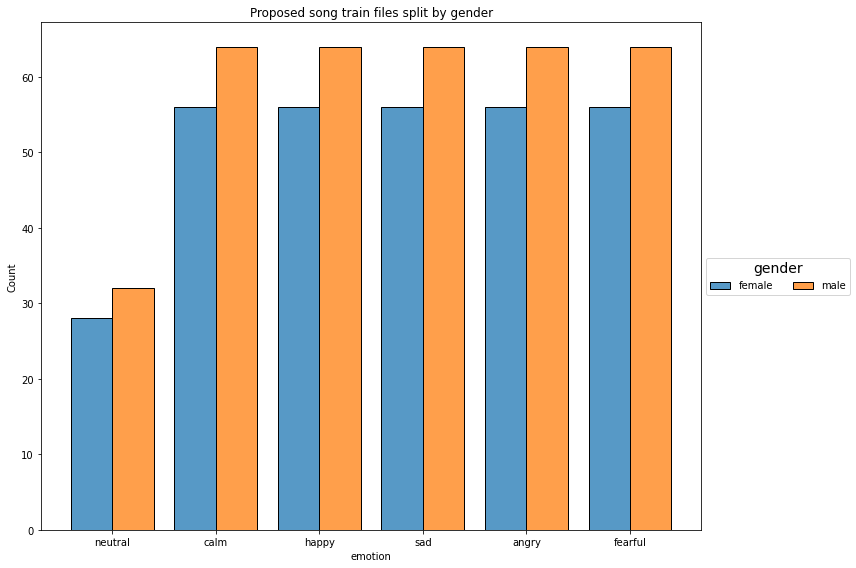

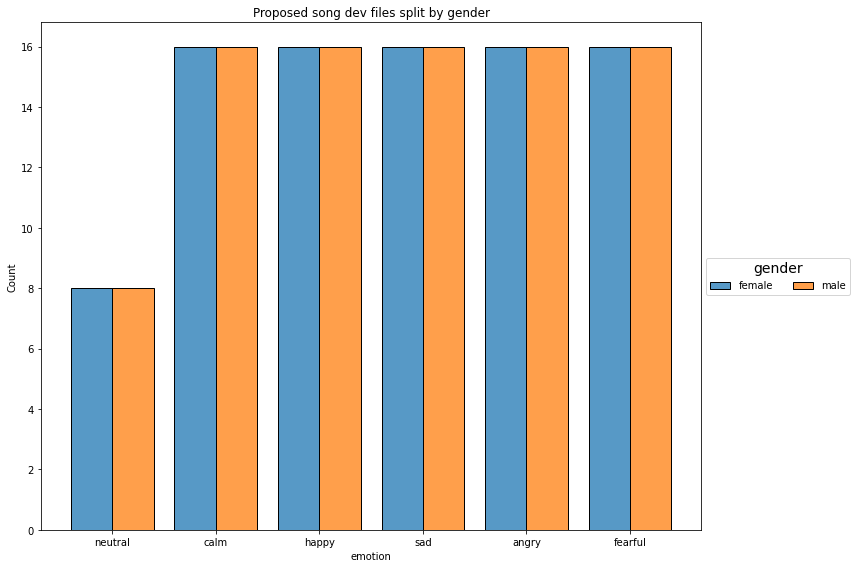

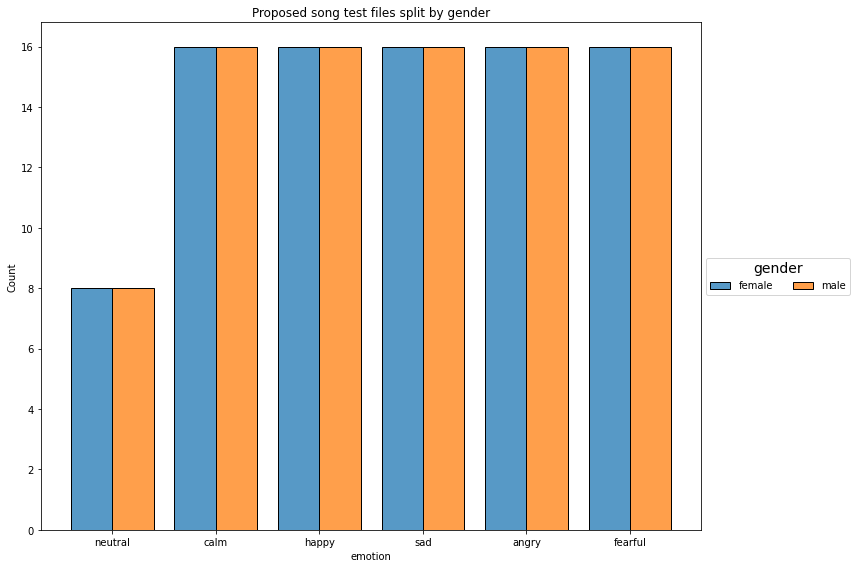

In [4]:
train_df = emotion_df[emotion_df['speaker'].isin(['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '18'])]
dev_df = emotion_df[emotion_df['speaker'].isin(['16', '17', '19', '20'])]
test_df = emotion_df[emotion_df['speaker'].isin(['21', '22', '23', '24'])]

train_speech_df = train_df[train_df['vocal channel'] == 'speech']
dev_speech_df = dev_df[dev_df['vocal channel'] == 'speech']
test_speech_df = test_df[test_df['vocal channel'] == 'speech']

train_song_df = train_df[train_df['vocal channel'] == 'song']
dev_song_df = dev_df[dev_df['vocal channel'] == 'song']
test_song_df = test_df[test_df['vocal channel'] == 'song']


vis_hist(train_speech_df, hue='gender', title='Proposed speech train files split by gender', hue_order=['female', 'male'])
vis_hist(dev_speech_df, hue='gender', title='Proposed speech dev files split by gender', hue_order=['female', 'male'])
vis_hist(test_speech_df, hue='gender', title='Proposed speech test files split by gender', hue_order=['female', 'male'])

vis_hist(train_song_df, hue='gender', title='Proposed song train files split by gender', hue_order=['female', 'male'])
vis_hist(dev_song_df, hue='gender', title='Proposed song dev files split by gender', hue_order=['female', 'male'])
vis_hist(test_song_df, hue='gender', title='Proposed song test files split by gender', hue_order=['female', 'male'])
